# MIE 1624 Introduction to Data Science and Analytics – Winter 2021 Final Exam Project

In [ ]:
#Install Libraries

#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install scipy
# !pip install langdetect

In [4]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

/Users/fan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


# 1. Data Cleaning – [1 mark] 
Cleans the data by removing duplicate papers, making the text contents easier to mine by adjusting formatting, and extracting useful fields from the larger dataset such as authors, abstracts, date of publication and more. You may choose to use this starter code and clean data that it produces, or if your chosen algorithm requires a different format of data or approach, you are free to modify and/or write you own data

In [3]:
# load the meta data from the CSV file and extract out fields that will be useful to our application

df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep="first")
df=df.dropna()
df["abstract"] = df["abstract"].str.lower()
df.head()

,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


In [27]:
# pip install langdetect
from langdetect import detect

In [28]:
detect("War doesn't show who's right, just who's left.")
# 'en'
# >>> detect("Ein, zwei, drei, vier")

'en'

In [14]:
df['Year'] = pd.DatetimeIndex(df.publish_time).year
df.head()

,title,abstract,authors,publish_time,Year
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04,2001
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15,2000
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25,2000
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22,2001
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11,2001


<AxesSubplot:xlabel='Year', ylabel='Year'>

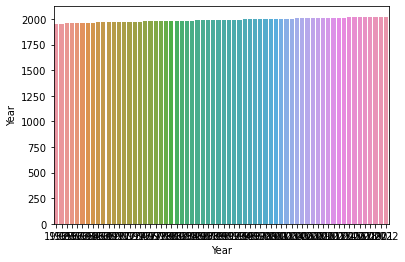

In [12]:
sns.barplot(x="Year", y="Year", data=df)


In [ ]:
 
year_df = raw_df.groupby(['Year','overall'])['overall'].count().unstack()
year_df = year_df.T.apply(lambda x : x/x.sum()).T
year_df.plot(legend=True)
plt.title('Percentage of Ratings Across Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()


# 2. Data Visualization and Exploratory Data Analysis – [4 marks] 
Depending on your overarching theme and questions that you wish to address about COVID-19 present 3 graphical figures that visualize aspects or information in the data that you will further explore with your models. How could these trends be used to help with the task of methodically extracting all information and trends of this type? Consider how accessing the data and creating these visualizations will inform how the data will need to be pre-processed and fed into your models. All graphs should be readable and presented in the notebook. All axes must be appropriately labeled. In addition to data visualizations, perform exploratory data analysis in other forms, if necessary.

# 3. Model selection and fitting to data – [12 marks] 
Select a machine learning model of your choice (you may select an unsupervised or supervised machine learning model depending on your approach) that will allow you to study some aspect of COVID-19 from the corpus of research articles. You must justify your algorithm choices and the approach you will use to fit your model using the dataset provided. You may also choose to study multiple models and report on the suitability of each in addressing your overarching question regarding COVID-19. You should also use the dataset provided to train the models selected and discuss and interpret the findings of these models. You may also use this section to improve the model depending on the findings of your models and how you interpret them.

In [ ]:
14

# 4. Deriving insights about policy and guidance to tackle the outbreak based on model findings – [7 marks] 
Using the findings from your NLP model and text mining 400,000 unique biomedical research papers on the coronavirus you are now tasked with discussing and proposing how scientists, doctors, nurses, healthcare professionals, industry and governments can best use the insights from your data science model to assist in the fight against the COVID-19 pandemic. Use the insights derived about the disease from your model and your data analysis to justify proposed policies or action items.

In [ ]:
15